In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
df=pd.read_csv(r"C:\Users\Akshat\Downloads\IPL2016.csv")
df

,Unnamed: 0,overall_sr,won
0,1,168.817204,1
1,2,165.432099,0
2,3,121.568627,0
3,4,149.541284,1
4,5,151.898734,0
5,6,124.489796,0
6,7,112.000000,0
7,8,178.688525,1
8,9,150.000000,1
9,10,91.176471,0


In [3]:
arr=np.array(df)

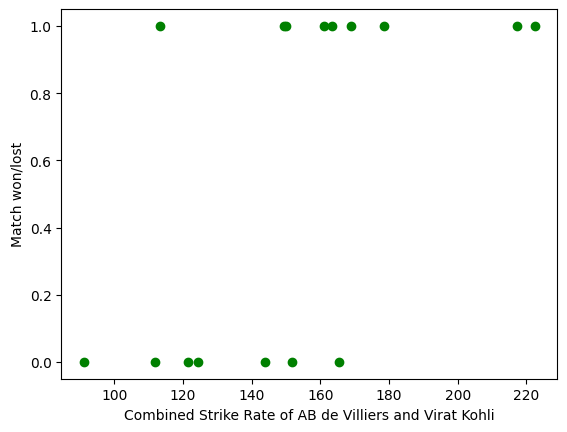

In [4]:
features=arr[:,1]
targets=arr[:,2]

plt.scatter(features, targets, c='green')
plt.xlabel('Combined Strike Rate of AB de Villiers and Virat Kohli')
plt.ylabel('Match won/lost')
plt.show()

In [5]:
mean=np.mean(features)
std=np.std(features)

features=(features-mean)/std

In [6]:
features

array([ 0.48014607,  0.38237206, -0.88456255, -0.07661174, -0.00852012,
       -0.80018871, -1.16093888,  0.76526525, -0.06336239, -1.76239721,
        2.02867348,  0.32410043,  1.88072554, -1.12606058,  0.2608412 ,
       -0.23948185])

In [7]:
def compute_loss(pred, targ):

    eps=1.0e-10

    if(targ==0):
        loss=-(np.log(1-pred+eps))

    else:
        loss=-(np.log(pred+eps))

    return loss

In [8]:
def compute_cost(y_pred, y,w):
    cost=0
    m=len(y)
    for i in range(m):
        cost+=compute_loss(y_pred[i], y[i])
        
    cost+=0.01*(w**2)
    cost/=m
    return cost

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [10]:
def pred(X,w,b):

    m=len(X)
    y=np.zeros((m), dtype=np.float16)    

    z=np.dot(X,w)+b
    y=sigmoid(z)

    return y

In [11]:
def compute_gradient(w,b,X,y):
    m=len(y)
    predictions=pred(X,w,b)
    act=y
    dw=0
    db=0

    err=predictions-y

    dw=(np.dot(X.T, err)+0.02*w)/m
    db=np.sum(err)/m

    return db, dw

In [12]:
def gradient_descent(X,y,num_epochs,w_init,b_init,alpha):
    w=w_init
    b=b_init
    cost_history=[]
    
    for i in range(num_epochs):
        y_pred=pred(X,w,b)
        loss=compute_cost(y_pred,y,w)
        db, dw=compute_gradient(w,b,X,y)
        cost_history.append(loss)

        w=w-dw*alpha
        b=b-db*alpha

    return w, b, cost_history

In [13]:
w_init=np.random.randn()
b_init=np.random.randn()
w,b,hist=gradient_descent(features,targets,10000,w_init,b_init,0.001)

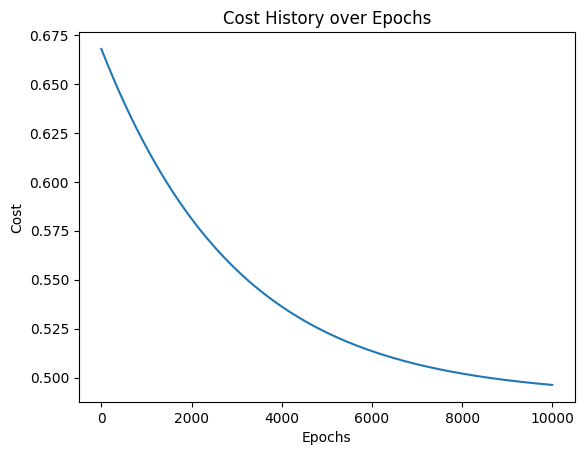

In [14]:
plt.plot(hist)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost History over Epochs')
plt.show()

In [15]:
def fpred(X, w, b):
    p=pred(X, w, b)
    y=np.zeros(X.shape[0])
    for i in range(len(y)):
        if(p[i]>=0.5):
            y[i]=1

        else:
            y[i]=0

    return y

In [16]:
print("Final weight:", w)
print("Final bias:", b)
print("Targets:", (features,targets))
print("Predictions:", fpred(features, w, b))

Final weight: 1.6457400632324375
Final bias: 0.16263970108957043
Targets: (array([ 0.48014607,  0.38237206, -0.88456255, -0.07661174, -0.00852012,
       -0.80018871, -1.16093888,  0.76526525, -0.06336239, -1.76239721,
        2.02867348,  0.32410043,  1.88072554, -1.12606058,  0.2608412 ,
       -0.23948185]), array([1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.]))
Predictions: [1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]


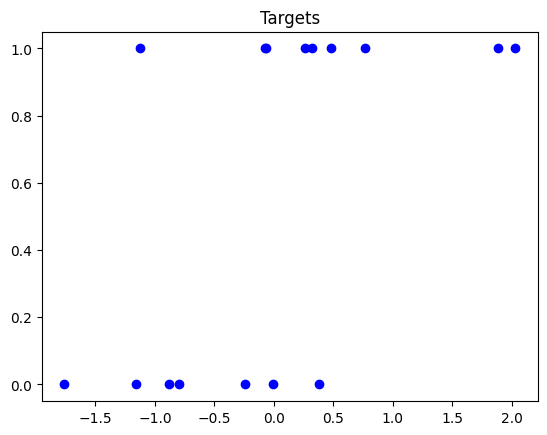

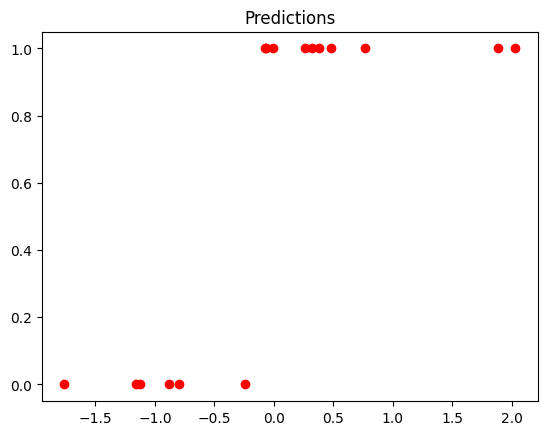

In [17]:
p=fpred(features, w, b)
plt.scatter(features, targets, c='blue')
plt.title('Targets')
plt.show()


plt.scatter(features, p, c='red')
plt.title('Predictions')
plt.show()

In [18]:
arr[:,1]

array([168.8172043 , 165.43209877, 121.56862745, 149.5412844 ,
       151.89873418, 124.48979592, 112.        , 178.68852459,
       150.        ,  91.17647059, 222.42990654, 163.41463415,
       217.30769231, 113.20754717, 161.2244898 , 143.90243902])

In [19]:
feat=np.arange(91.17647059,217.30769231,1)
feat

array([ 91.17647059,  92.17647059,  93.17647059,  94.17647059,
        95.17647059,  96.17647059,  97.17647059,  98.17647059,
        99.17647059, 100.17647059, 101.17647059, 102.17647059,
       103.17647059, 104.17647059, 105.17647059, 106.17647059,
       107.17647059, 108.17647059, 109.17647059, 110.17647059,
       111.17647059, 112.17647059, 113.17647059, 114.17647059,
       115.17647059, 116.17647059, 117.17647059, 118.17647059,
       119.17647059, 120.17647059, 121.17647059, 122.17647059,
       123.17647059, 124.17647059, 125.17647059, 126.17647059,
       127.17647059, 128.17647059, 129.17647059, 130.17647059,
       131.17647059, 132.17647059, 133.17647059, 134.17647059,
       135.17647059, 136.17647059, 137.17647059, 138.17647059,
       139.17647059, 140.17647059, 141.17647059, 142.17647059,
       143.17647059, 144.17647059, 145.17647059, 146.17647059,
       147.17647059, 148.17647059, 149.17647059, 150.17647059,
       151.17647059, 152.17647059, 153.17647059, 154.17

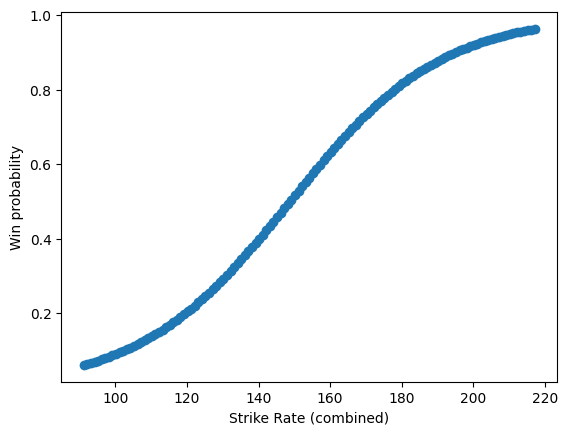

In [20]:
plt.scatter(feat, pred((feat-mean)/std,w,b))
plt.xlabel('Strike Rate (combined)')
plt.ylabel('Win probability')
plt.show()

In [21]:
def accuracy(X,y,w,b):
    p=fpred(X,w,b)
    ct=0
    m=len(y)
    for i in range(m):
        if(p[i]==y[i]):
            ct+=1

    print(f"Accuracy over training data: {100*ct/m} %")

In [22]:
accuracy(features, targets, w, b)

Accuracy over training data: 81.25 %


In [23]:
def predict(score, w, b):
    score=(score-mean)/std
    f=(w*score+b)
    y=1/(1+math.exp(-f))
    print(f"Probability  of winning: {y}")
    """if(y>=0.5):
        print("RCB WILL WIN!!!")
    else:
        print("RCB WILL LOSE :(")"""

In [35]:
x=float(input())
predict(x, w, b)

Probability  of winning: 0.5003299557968377
